In [145]:
%pylab inline 
import matplotlib as plt
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
arch=genfromtxt("./archj.csv",delimiter=",")

In [134]:
#importar las variables 

lon=arch[:,0]
lat=arch[:,1]
hora=arch[:,3]
minuto=arch[:,4]
segundo=arch[:,5]
r=6371

In [135]:
r=6371
x=r*radians(sin(90.-lat))*radians(cos(lon))
y=r*radians(sin(90.-lat))*radians(sin(lon))
t=hora+(minuto+(segundo/60.))/60.


In [136]:
#Vectores de desplazamiento espacio-temporal
piX=x[0]   #posición inicial
piY=y[0]   #posición final

pa=numpy.zeros(len(x))      #posición actual
dX=numpy.zeros(len(x))     #desplazamiento x
dY=numpy.zeros(len(y))    #desplazamiento y 
dt=numpy.zeros(len(t))     #tiempo
for i in range(len(x)):
    dX[i]=x[i]-x[0]
    dY[i]=y[i]-y[0]
    dt[i]=t[i]-t[0]

In [137]:
print dt

[  0.00000000e+00   5.55555556e-04   2.77777778e-03 ...,   1.65333333e+00
   1.65388889e+00   1.65416667e+00]


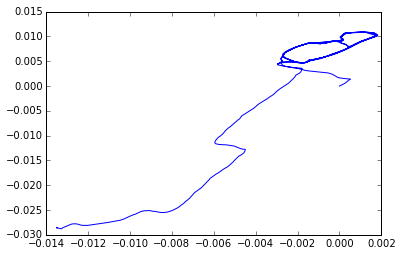

In [138]:
plot(dX,dY)
title=("Trayectoria.")
show()
 

In [139]:
urefl=radians(90.-4.5981)
urefln=radians(-74.0758)

oriente=numpy.array(radians(-sin(urefln)),radians(cos(urefln)))
norte=numpy.array(radians(cos(urefln)*cos(urefl)),radians(sin(urefln)*cos(urefl)))

nx=dot(oriente,dX)
ny=dot(norte,dY)


In [140]:
print nx

[  0.00000000e+00   1.39203687e-06   3.15726208e-06 ...,  -2.26519417e-04
  -2.26519417e-04  -2.26519417e-04]


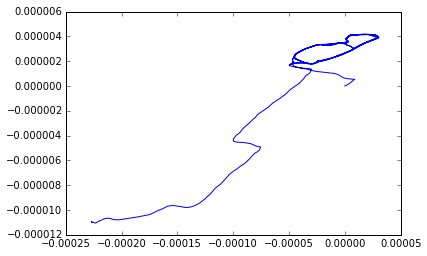

In [177]:
plot(nx,ny)
#xlabel('posición en x')
#ylabel('posición en y')

[  2.26519417e-04   1.39313373e-06   1.77107957e-06 ...,   1.10103290e-05
   1.10103290e-05   1.10103290e-05]
[  0.00000000e+00   5.55555556e-04   2.77777778e-03 ...,   1.65333333e+00
   1.65388889e+00   1.65416667e+00]
[  2.26519417e-04   1.39203687e-06   1.76522521e-06 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
Distancia recorrida: 0.00749142013549


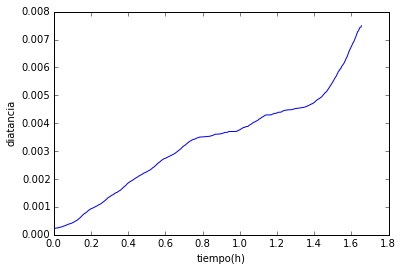

In [180]:
#DISTACIA RECORRIDA.
xf=numpy.zeros(len(nx))    
yf=numpy.zeros(len(ny))
for i in range (len(nx)):
    xf[i]=nx[i]-nx[i-1]
    yf[i]=ny[i]-ny[1-1]
dr=sqrt(xf**2+yf**2)
distt=cumsum(dr)
print dr
print dt
print xf
plot(dt,distt)
xlabel('tiempo(h)')
ylabel('diatancia')

print "Distancia recorrida:",distt[-1]

In [170]:
#Tiempo requerido para recorrer cierta distancia 

distancia=interpolate.interp1d(dt,distt,kind="cubic")
#construir una función que dependa del tiempo

tp=numpy.linspace(0,1.6,10000)

funcion=distancia(tp)

for i in range(9):
    m=numpy.where(funcion>i)
    print "En",i,"km se necesitan",tp[m],"En ese momento se econtrará en",distancia[m] 


En 0 km se necesitan [  0.00000000e+00   1.60016002e-04   3.20032003e-04 ...,   1.59967997e+00
   1.59983998e+00   1.60000000e+00] En ese momento se econtrará en

TypeError: 'interp1d' object has no attribute '__getitem__'

In [168]:
print range(9)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
